## SMOTE(Synthetic Minority Oversampling Technique)

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning **to address imbalanced datasets** where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class **by interpolating between existing instances.**

**Interpolation:** Method for constructing new data points between known data points

Revise the SMOTE Theoritical concept from the PDF before revising this notebook

Let's use a new method to create a imbalance datasets

In [1]:
from sklearn.datasets import make_classification

**make_classification module**:

Generate a random n-class classification problem.

This initially creates clusters of points normally distributed (std=1)
about vertices of an ``n_informative``-dimensional hypercube with sides of
length ``2*class_sep`` and assigns an equal number of clusters to each
class. It introduces interdependence between these features and adds
various types of further noise to the data.

In [2]:
# **Hyperparameters available for make_classification module**:
    
# make_classification(
#     n_samples=100, -->  how many number of data points you want to create
#     n_features=20, --> how many features you want to create
#     *,
#     n_informative=2,
#     n_redundant=2,
#     n_repeated=0,
#     n_classes=2, --> how many classes you want to generate in the target feature
#     n_clusters_per_class=2, --> how many clusters per each class you want to generate
#     weights=None,
#     flip_y=0.01,
#     class_sep=1.0,
#     hypercube=True,
#     shift=0.0,
#     scale=1.0,
#     shuffle=True,
#     random_state=None,
# )

In [3]:
make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,weights=[0.90],random_state=12,n_redundant=0)

# weights=[0.90] means one of the class is 90% and remaining class data points will be 10% out of 1000 data points (n_samples)

(array([[-0.76289759, -0.70680807],
        [-1.07543571, -1.0511621 ],
        [-0.61011459, -0.90980157],
        ...,
        [-1.32643852, -1.815178  ],
        [-0.83348573, -0.5146474 ],
        [-0.30287558, -0.57597532]]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [4]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,weights=[0.90],random_state=12,n_redundant=0)

In [5]:
X # It has 2 features

array([[-0.76289759, -0.70680807],
       [-1.07543571, -1.0511621 ],
       [-0.61011459, -0.90980157],
       ...,
       [-1.32643852, -1.815178  ],
       [-0.83348573, -0.5146474 ],
       [-0.30287558, -0.57597532]])

In [6]:
y

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [7]:
# X --> Independent feature y--> dependent feature

In [8]:
import pandas as pd

df1= pd.DataFrame(X,columns=["f1","f2"])
df2= pd.DataFrame(y,columns=["target"])

In [9]:
df1

,f1,f2
0,-0.762898,-0.706808
1,-1.075436,-1.051162
2,-0.610115,-0.909802
3,-2.023284,-0.428945
4,-0.812921,-1.316206
...,...,...
995,-0.712495,-0.880452
996,-2.625830,-2.827891
997,-1.326439,-1.815178
998,-0.833486,-0.514647


In [10]:
df2

,target
0,0
1,0
2,0
3,1
4,0
...,...
995,0
996,0
997,0
998,0


In [11]:
# concatenate the both the dataframes

df_final= pd.concat([df1,df2],axis=1)

In [12]:
df_final

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [13]:
df_final.target.value_counts()

# 900 0's and 100 1's --> Imbalanced dataset

target
0    900
1    100
Name: count, dtype: int64

<Axes: xlabel='f1', ylabel='f2'>

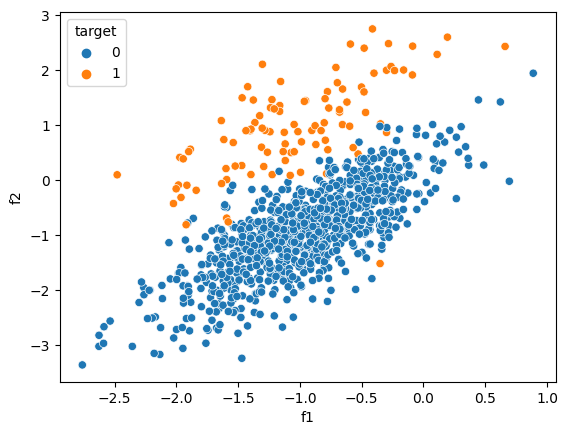

In [14]:
import seaborn as sns

sns.scatterplot(x="f1",y="f2",data=df1,hue=df2.target)

<Axes: xlabel='f1', ylabel='f2'>

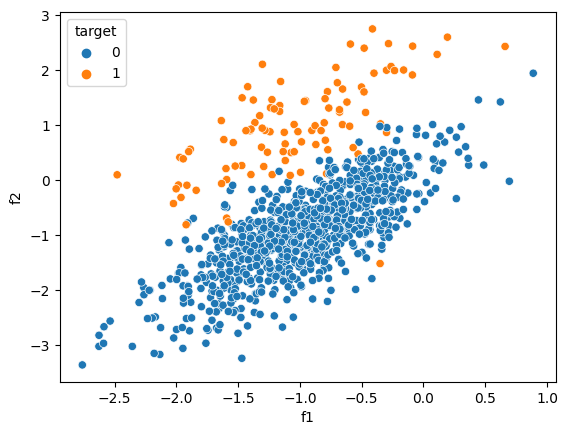

In [15]:
# we can plot scatter plot using the concatenated data

sns.scatterplot(x="f1",y="f2",data=df_final,hue=df_final.target)

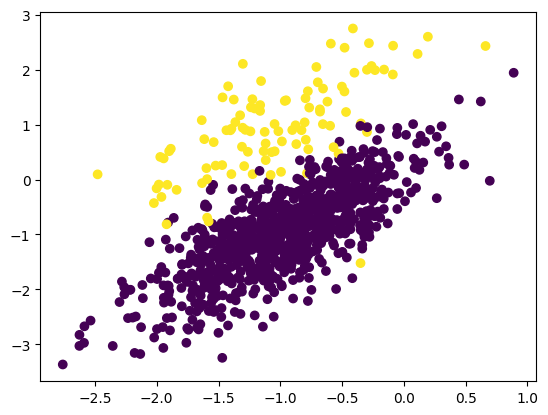

In [16]:
# we can plot using matplotlib as well

import matplotlib.pyplot as plt

plt.scatter(x="f1",y="f2",data=df_final,c=df_final.target)

In [17]:
# as we taken n_clusters as 2 during the creation of data points, we got two clusters in the data

In [18]:
# Let's use the SMOTE and try to generate the new datapoints to remove the imbalance in the dataset

In [19]:
# Import the package imblearn to apply SMOTE technique

# Use the below command to install the imblearn package through jupyter notebook

# !pip install imblearn

In [20]:
import imblearn

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
# Trnasform the data using SMOTE
oversample=SMOTE()
X,y=oversample.fit_resample(df_final[["f1","f2"]],df_final["target"])

In [23]:
X,y

(            f1        f2
 0    -0.762898 -0.706808
 1    -1.075436 -1.051162
 2    -0.610115 -0.909802
 3    -2.023284 -0.428945
 4    -0.812921 -1.316206
 ...        ...       ...
 1795  0.091198  2.574256
 1796 -1.001507  0.787337
 1797 -1.404354  0.908449
 1798 -1.060998  0.504438
 1799 -0.790780  1.037584
 
 [1800 rows x 2 columns],
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 1795    1
 1796    1
 1797    1
 1798    1
 1799    1
 Name: target, Length: 1800, dtype: int32)

In [24]:
X.shape # Initially it has 900 records but due to the SMOTE we got 1800 records

(1800, 2)

In [25]:
y.shape

(1800,)

In [26]:
# Check how many records for 0's and 1's we have.

y[y==0] # As you can see length=900

0      0
1      0
2      0
4      0
5      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: target, Length: 900, dtype: int32

In [27]:
len(y[y==0])

900

In [28]:
y[y==1] # As you can see length=900

3       1
19      1
26      1
34      1
39      1
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 900, dtype: int32

In [29]:
len(y[y==1])

900

In [30]:
df3= pd.DataFrame(X,columns=["f1","f2"])
df4= pd.DataFrame(y,columns=["target"])
oversample_df=pd.concat([df3,df4],axis=1)

In [31]:
oversample_df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
1795,0.091198,2.574256,1
1796,-1.001507,0.787337,1
1797,-1.404354,0.908449,1
1798,-1.060998,0.504438,1


<Axes: xlabel='f1', ylabel='f2'>

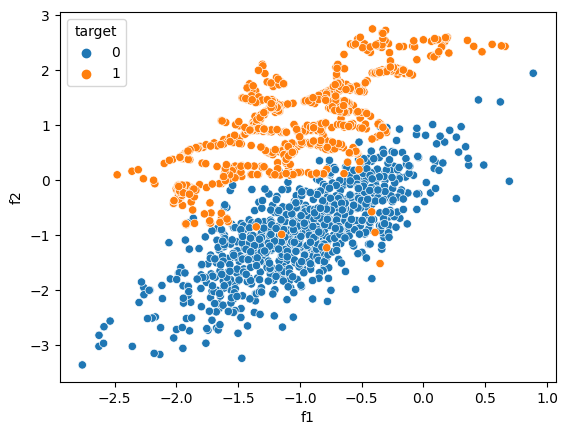

In [32]:
sns.scatterplot(x="f1",y="f2",data=oversample_df,hue="target")

In [33]:
# As you can observe the new datapoints are created for orange color data(1's) using interpolation technique.

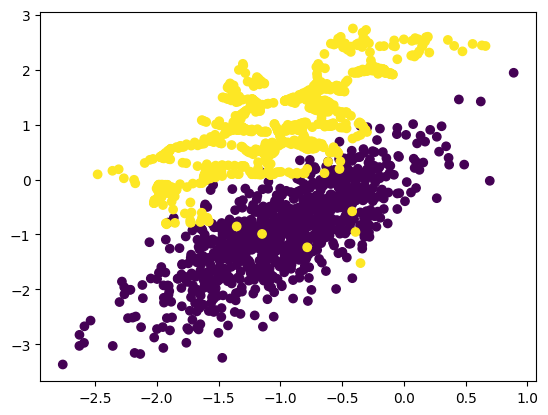

In [34]:
plt.scatter(oversample_df["f1"],oversample_df["f2"],c=oversample_df["target"])